Extracted files: ['H_ML_001_C_M_043_003.wav', 'H_ML_001_G_M_014_005.wav', 'H_ML_001_G_M_014_004.wav', 'H_ML_001_C_F_044_010.wav', 'H_ML_001_R_F_026_006.wav']
Unique class labels: ['C' 'G' 'N' 'P' 'R']
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Train Accuracy: 1.0000
Test Accuracy: 0.7293


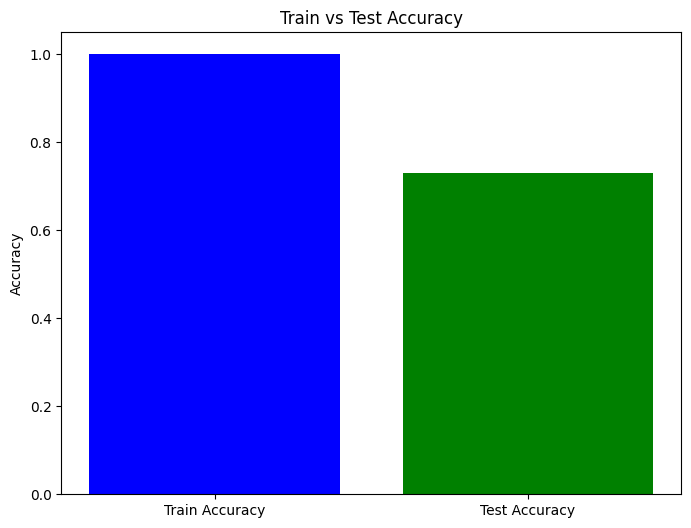

Classification Report:
              precision    recall  f1-score   support

           C       0.65      0.89      0.75        37
           G       0.75      0.25      0.38        12
           N       0.85      0.96      0.91        55
           P       0.50      0.40      0.44        15
           R       0.50      0.14      0.22        14

    accuracy                           0.73       133
   macro avg       0.65      0.53      0.54       133
weighted avg       0.71      0.73      0.69       133



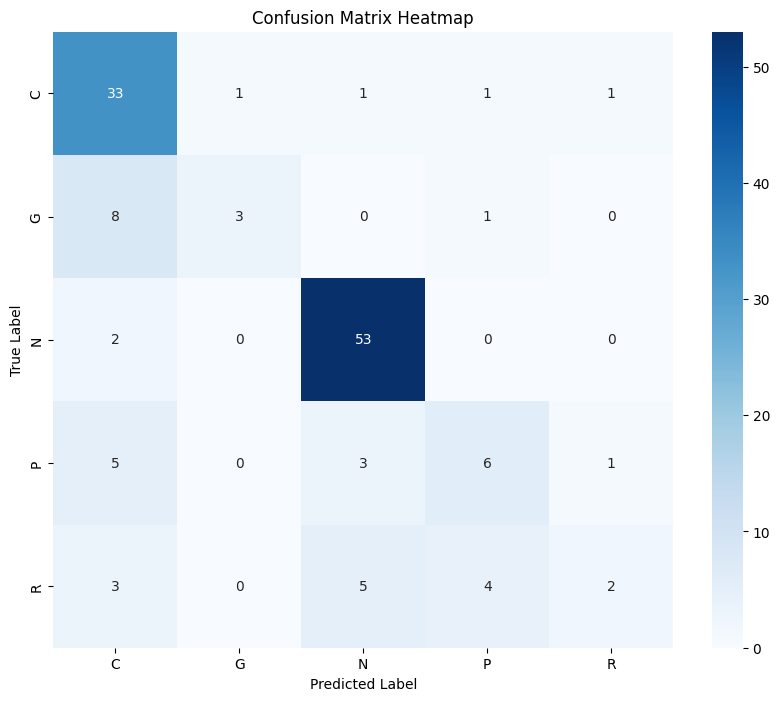

Macro F1-Score: 0.5395


In [ ]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Step 1: Define the path to the zip file and extract it
zip_file_path = '/content/drive/MyDrive/Dravidian-2025/Malayalam/Audio/Preprocessed audio/train_audio_preprocessed4.zip'
extracted_folder = '/content/drive/MyDrive/Dravidian-2025/Malayalam/Audio/Preprocessed audio/train_audio_preprocessed4'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Verify that the files have been extracted
extracted_files = os.listdir(extracted_folder)
print(f"Extracted files: {extracted_files[:5]}")  # Show first 5 files to confirm extraction

# Function to extract class from file name
# Function to extract class from file name
def extract_class_from_file(file_name):
    parts = file_name.split('_')  # Split by underscores
    if len(parts) >= 4:
        class_label = parts[3]  # Extract the 4th part
        if class_label in ['G', 'P', 'R', 'C', 'N']:  # Add 'N' for non-hate categories
            return class_label
    return None  # Return None if the class cannot be determined

# Step 2: Extract features and labels from .wav files
labels = []
features = []

for file_name in extracted_files:
    if file_name.endswith(".wav"):
        file_path = os.path.join(extracted_folder, file_name)
        class_label = extract_class_from_file(file_name)
        if class_label:  # Only process files with valid labels
            features.append(extract_features(file_path))
            labels.append(class_label)

# Convert features and labels to arrays
X = np.array(features)
y = np.array(labels)

# Check the unique labels
print(f"Unique class labels: {np.unique(y)}")

# Step 3: Encode Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 4: Standardize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate on Test Data
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Decode labels
y_test_actual = label_encoder.inverse_transform(y_test)
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)

# Step 7: Metrics and Plots
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
# Plot Accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.title("Train vs Test Accuracy")
plt.ylabel("Accuracy")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_actual, y_test_pred_decoded))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_actual, y_test_pred_decoded, labels=label_encoder.classes_)

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Macro F1-Score
macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")



Extracted files: ['H_ML_001_C_M_043_003.wav', 'H_ML_001_G_M_014_005.wav', 'H_ML_001_G_M_014_004.wav', 'H_ML_001_C_F_044_010.wav', 'H_ML_001_R_F_026_006.wav']
Unique class labels: ['C' 'G' 'N' 'P' 'R']
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Train Accuracy: 0.9301
Test Accuracy: 0.6241


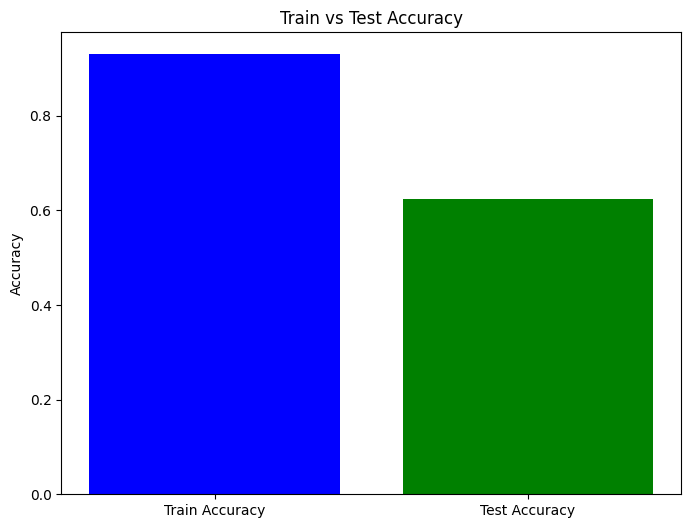

Classification Report:
              precision    recall  f1-score   support

           C       0.68      0.81      0.74        37
           G       0.11      0.08      0.10        12
           N       0.81      0.85      0.83        55
           P       0.15      0.13      0.14        15
           R       0.33      0.21      0.26        14

    accuracy                           0.62       133
   macro avg       0.42      0.42      0.41       133
weighted avg       0.59      0.62      0.60       133



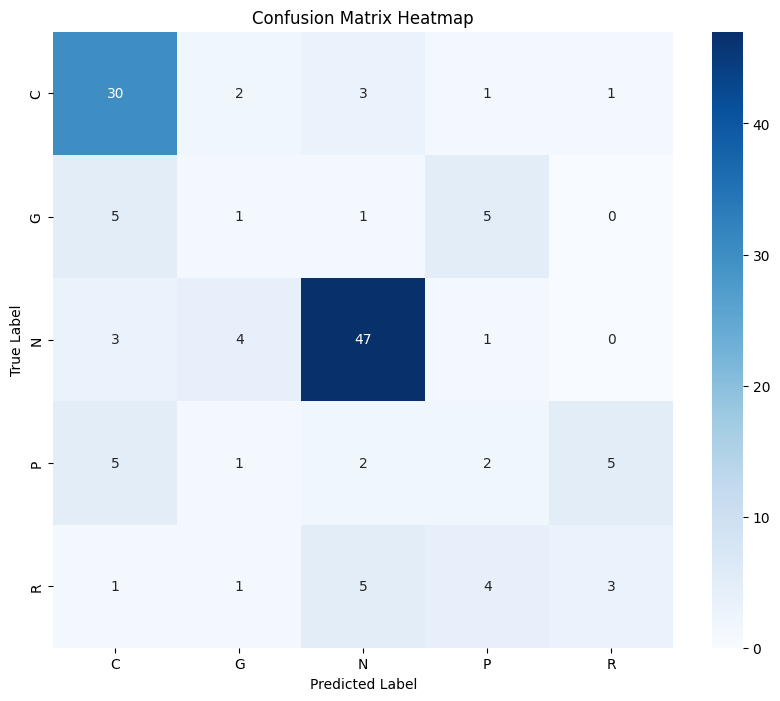

Macro F1-Score: 0.4143


In [ ]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import zipfile  # Ensure zipfile is imported

# Step 1: Define the path to the zip file and extract it
zip_file_path = '/content/drive/MyDrive/Dravidian-2025/Malayalam/Audio/Preprocessed audio/train_audio_preprocessed4.zip'
extracted_folder = '/content/drive/MyDrive/Dravidian-2025/Malayalam/Audio/Preprocessed audio/train_audio_preprocessed4'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Verify that the files have been extracted
extracted_files = os.listdir(extracted_folder)
print(f"Extracted files: {extracted_files[:5]}")  # Show first 5 files to confirm extraction

# Function to extract class from file name
def extract_class_from_file(file_name):
    parts = file_name.split('_')  # Split by underscores
    if len(parts) >= 4:
        class_label = parts[3]  # Extract the 4th part
        if class_label in ['G', 'P', 'R', 'C', 'N']:  # Add 'N' for non-hate categories
            return class_label
    return None  # Return None if the class cannot be determined

# Step 2: Extract features and labels from .wav files
labels = []
features = []

for file_name in extracted_files:
    if file_name.endswith(".wav"):
        file_path = os.path.join(extracted_folder, file_name)
        class_label = extract_class_from_file(file_name)
        if class_label:  # Only process files with valid labels
            features.append(extract_features(file_path))
            labels.append(class_label)

# Convert features and labels to arrays
X = np.array(features)
y = np.array(labels)

# Check the unique labels
print(f"Unique class labels: {np.unique(y)}")

# Step 3: Encode Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 4: Standardize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Hyperparameter Tuning with GridSearchCV for Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt = DecisionTreeClassifier(random_state=42)  # Using DecisionTreeClassifier
grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_dt_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate on Test Data
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

# Decode labels
y_test_actual = label_encoder.inverse_transform(y_test)
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)

# Step 7: Metrics and Plots
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
# Plot Accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.title("Train vs Test Accuracy")
plt.ylabel("Accuracy")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_actual, y_test_pred_decoded))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_actual, y_test_pred_decoded, labels=label_encoder.classes_)

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Macro F1-Score
macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")


Extracted files: ['H_ML_001_C_M_043_003.wav', 'H_ML_001_G_M_014_005.wav', 'H_ML_001_G_M_014_004.wav', 'H_ML_001_C_F_044_010.wav', 'H_ML_001_R_F_026_006.wav']
Unique class labels: ['C' 'G' 'N' 'P' 'R']
Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Train Accuracy: 1.0000
Test Accuracy: 0.7744


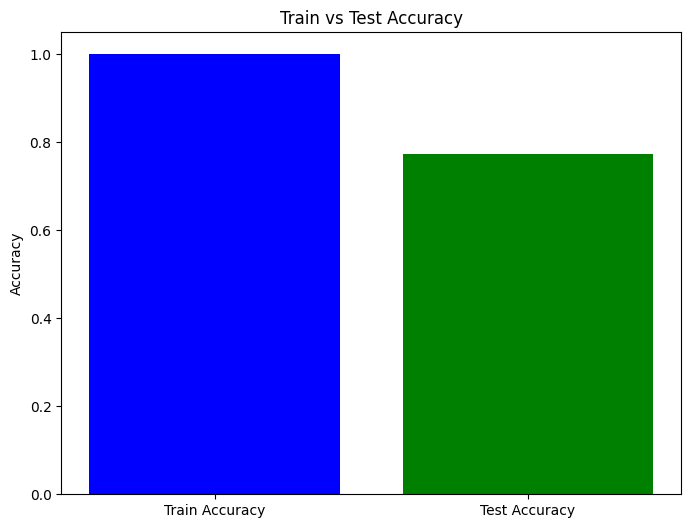

Classification Report:
              precision    recall  f1-score   support

           C       0.78      0.84      0.81        37
           G       0.70      0.58      0.64        12
           N       0.89      1.00      0.94        55
           P       0.71      0.33      0.45        15
           R       0.36      0.36      0.36        14

    accuracy                           0.77       133
   macro avg       0.69      0.62      0.64       133
weighted avg       0.76      0.77      0.76       133



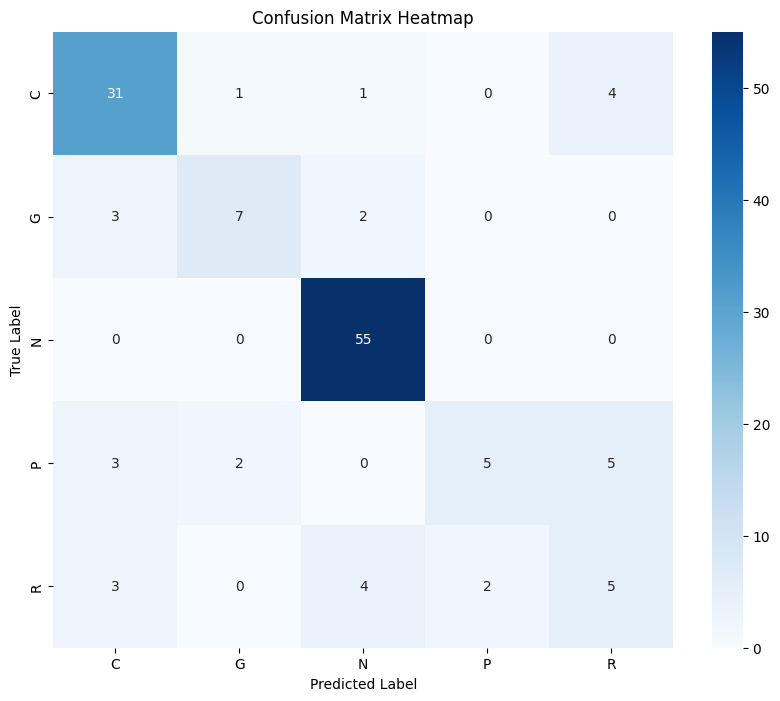

Macro F1-Score: 0.6387


In [ ]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import zipfile  # Ensure zipfile is imported

# Step 1: Define the path to the zip file and extract it
zip_file_path = '/content/drive/MyDrive/Dravidian-2025/Malayalam/Audio/Preprocessed audio/train_audio_preprocessed4.zip'
extracted_folder = '/content/drive/MyDrive/Dravidian-2025/Malayalam/Audio/Preprocessed audio/train_audio_preprocessed4'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Verify that the files have been extracted
extracted_files = os.listdir(extracted_folder)
print(f"Extracted files: {extracted_files[:5]}")  # Show first 5 files to confirm extraction

# Function to extract class from file name
def extract_class_from_file(file_name):
    parts = file_name.split('_')  # Split by underscores
    if len(parts) >= 4:
        class_label = parts[3]  # Extract the 4th part
        if class_label in ['G', 'P', 'R', 'C', 'N']:  # Add 'N' for non-hate categories
            return class_label
    return None  # Return None if the class cannot be determined

# Step 2: Extract features and labels from .wav files
labels = []
features = []

for file_name in extracted_files:
    if file_name.endswith(".wav"):
        file_path = os.path.join(extracted_folder, file_name)
        class_label = extract_class_from_file(file_name)
        if class_label:  # Only process files with valid labels
            features.append(extract_features(file_path))
            labels.append(class_label)

# Convert features and labels to arrays
X = np.array(features)
y = np.array(labels)

# Check the unique labels
print(f"Unique class labels: {np.unique(y)}")

# Step 3: Encode Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 4: Standardize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Hyperparameter Tuning with GridSearchCV for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}
knn = KNeighborsClassifier()  # Using KNeighborsClassifier
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_knn_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate on Test Data
y_train_pred = best_knn_model.predict(X_train)
y_test_pred = best_knn_model.predict(X_test)

# Decode labels
y_test_actual = label_encoder.inverse_transform(y_test)
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)

# Step 7: Metrics and Plots
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
# Plot Accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.title("Train vs Test Accuracy")
plt.ylabel("Accuracy")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_actual, y_test_pred_decoded))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_actual, y_test_pred_decoded, labels=label_encoder.classes_)

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Macro F1-Score
macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")


Extracted files: ['H_ML_001_C_M_043_003.wav', 'H_ML_001_G_M_014_005.wav', 'H_ML_001_G_M_014_004.wav', 'H_ML_001_C_F_044_010.wav', 'H_ML_001_R_F_026_006.wav']
Unique class labels: ['C' 'G' 'N' 'P' 'R']
Best Parameters: {'C': 1, 'solver': 'liblinear'}
Train Accuracy: 0.7921
Test Accuracy: 0.7218


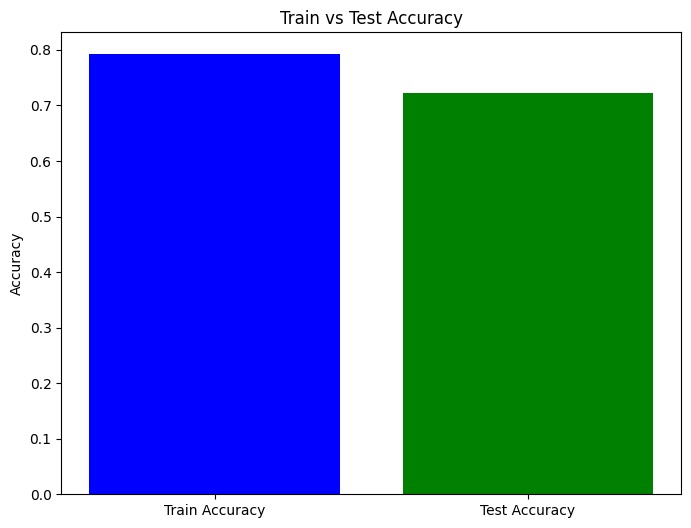

Classification Report:
              precision    recall  f1-score   support

           C       0.70      0.86      0.77        37
           G       0.50      0.25      0.33        12
           N       0.86      0.93      0.89        55
           P       0.55      0.40      0.46        15
           R       0.36      0.29      0.32        14

    accuracy                           0.72       133
   macro avg       0.59      0.55      0.56       133
weighted avg       0.70      0.72      0.70       133



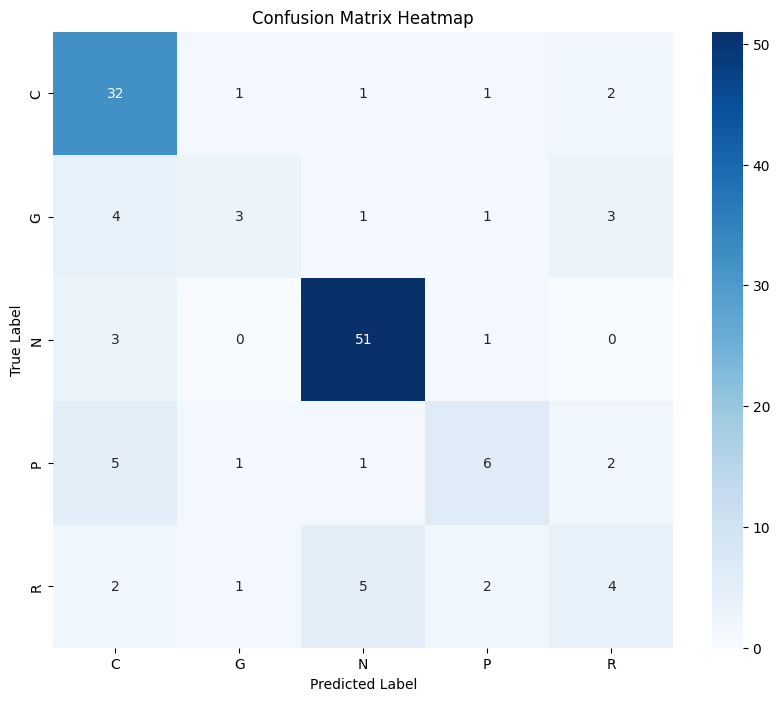

Macro F1-Score: 0.5561


In [ ]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import zipfile  # Ensure zipfile is imported

# Step 1: Define the path to the zip file and extract it
zip_file_path = '/content/drive/MyDrive/Dravidian-2025/Malayalam/Audio/Preprocessed audio/train_audio_preprocessed4.zip'
extracted_folder = '/content/drive/MyDrive/Dravidian-2025/Malayalam/Audio/Preprocessed audio/train_audio_preprocessed4'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Verify that the files have been extracted
extracted_files = os.listdir(extracted_folder)
print(f"Extracted files: {extracted_files[:5]}")  # Show first 5 files to confirm extraction

# Function to extract class from file name
def extract_class_from_file(file_name):
    parts = file_name.split('_')  # Split by underscores
    if len(parts) >= 4:
        class_label = parts[3]  # Extract the 4th part
        if class_label in ['G', 'P', 'R', 'C', 'N']:  # Add 'N' for non-hate categories
            return class_label
    return None  # Return None if the class cannot be determined

# Step 2: Extract features and labels from .wav files
labels = []
features = []

for file_name in extracted_files:
    if file_name.endswith(".wav"):
        file_path = os.path.join(extracted_folder, file_name)
        class_label = extract_class_from_file(file_name)
        if class_label:  # Only process files with valid labels
            features.append(extract_features(file_path))
            labels.append(class_label)

# Convert features and labels to arrays
X = np.array(features)
y = np.array(labels)

# Check the unique labels
print(f"Unique class labels: {np.unique(y)}")

# Step 3: Encode Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 4: Standardize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Hyperparameter Tuning with GridSearchCV for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solvers for optimization
}
logreg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_logreg_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate on Test Data
y_train_pred = best_logreg_model.predict(X_train)
y_test_pred = best_logreg_model.predict(X_test)

# Decode labels
y_test_actual = label_encoder.inverse_transform(y_test)
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)

# Step 7: Metrics and Plots
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
# Plot Accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.title("Train vs Test Accuracy")
plt.ylabel("Accuracy")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_actual, y_test_pred_decoded))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_actual, y_test_pred_decoded, labels=label_encoder.classes_)

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Macro F1-Score
macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import zipfile

# Define the path to the test zip file and extracted folder
test_zip_file = '/content/drive/MyDrive/Dravidian-2025/Malayalam/Audio/Preprocessed audio/finaled_test_audio_preprocessed4.zip'
test_extracted_folder = '/content/drive/MyDrive/Dravidian-2025/Malayalam/Audio/Preprocessed audio/extracted_test_audio'

# Unzip Test Dataset
if not os.path.exists(test_extracted_folder):
    with zipfile.ZipFile(test_zip_file, 'r') as zip_ref:
        zip_ref.extractall(test_extracted_folder)

# Extract Test Features
def extract_class_from_file(file_name):
    parts = file_name.split('_')
    if len(parts) >= 4:
        class_label = parts[3]
        if class_label in ['G', 'P', 'R', 'C']:
            return class_label
    return None

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y=y)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    features = np.concatenate((
        np.mean(mfcc, axis=1),
        np.mean(chroma, axis=1),
        np.mean(zcr, axis=1),
        np.mean(spectral_contrast, axis=1)
    ))
    return features

test_files = os.listdir(test_extracted_folder)
test_features = []
test_labels = []

for file_name in test_files:
    if file_name.endswith(".wav"):
        file_path = os.path.join(test_extracted_folder, file_name)
        features = extract_features(file_path)
        test_features.append(features)

        class_label = extract_class_from_file(file_name)
        if class_label:
            test_labels.append(class_label)

# Convert Test Features to Array and Scale
X_test_final = np.array(test_features)

# Assuming that scaler is already defined from training phase
X_test_final = scaler.transform(X_test_final)

# Predict Test Data using All Models
models = {
    "Random Forest": best_rf_model,
    "Decision Tree": best_dt_model,
    "Logistic Regression": best_lr_model,
    "KNN": best_knn_model  # Assuming you trained an SVM model named 'best_svm_model'
}

# Prepare an empty dictionary to hold the predictions
predictions_dict = {'File Name': test_files}

# For each model, predict and add the results to the dictionary
for model_name, model in models.items():
    test_predictions = model.predict(X_test_final)
    test_predictions_decoded = label_encoder.inverse_transform(test_predictions)

    # Get the first letter of each class label
    first_letter_predictions = [label[0] for label in test_predictions_decoded]

    predictions_dict[model_name] = first_letter_predictions

# Convert the dictionary to a DataFrame
test_predictions_df = pd.DataFrame(predictions_dict)

# Save Predictions to CSV
output_file = '/content/drivetest_audio_predictions_basicml_models.csv'
test_predictions_df.to_csv(output_file, index=False)

print(f"Predictions saved to {output_file}")


Predictions saved to /content/test_audio_predictions_basicml_models.csv
